# Falling object with air resistance
Consider the motion of a falling object with mass $m$ near the surface of the Eart when the air resistance varies liearly with the speed. $F_{d} = -b v$. By integrating Newton's law $F = m a$ we obtain the following expression for the position $y(t)$ of the object as a function of the elapsed time $t$:
$$y(t) = y_{0} + \frac{m g}{b}t + (\frac{m^2g}{b^2} - \frac{mv_0}{b})(e^{-\frac{b t}{m}}-1)$$
where $y_{0}$ is the initial position, $v_{0}$ is the initial speed, $g$ is the acceleration due to gravity.

(a) Find the analytical expressions for the velocity $v(t)$ and the acceleration $a(t)$, both by hand and using SymPy

(b) Use reasonable values of the parameters $y_{0}$, $v_{0}$, $m$, $b$, $g$ to plot $x(t)$, $v(t)$ and $a(t)$ and discuss the physical meaning of the results.

(a)
The velocity is the derivative of the position with respect to time:
$$v(t) = \frac{dx}{dt}$$
$$\frac{d}{dt}(y_0) = 0$$
$$\frac{d}{dt}(\frac{m g}{b}t) = \frac{m g}{b}$$
$$\frac{d}{dt}(\frac{m^2g}{b^2} - \frac{mv_0}{b})(e^{-\frac{b t}{m}}-1) = (\frac{m^2g}{b^2} - \frac{mv_0}{b})(-\frac{b}{m}e^{-\frac{b t}{m}})$$
$$v(t) = \frac{m g}{b} + (\frac{m^2g}{b^2} - \frac{mv_0}{b})(-\frac{b}{m}e^{-\frac{b t}{m}})$$
$$a(t) = \frac{dv}{dt}$$
$$a(t) = 0 + (\frac{m^2g}{b^2} - \frac{mv_0}{b})(-\frac{b}{m}e^{-\frac{b t}{m}})(-\frac{b}{m})$$
$$a(t) = (\frac{m^2g}{b^2} - \frac{mv_0}{b})(\frac{b^2}{m^2}e^{-\frac{b t}{m}})$$
$$a(t) = (g-\frac{b v_0}{m})e^{-\frac{b t}{m}}$$

v(t) (b*v0 + g*m*exp(b*t/m) - g*m)*exp(-b*t/m)/b
a(t) (-b*v0 + g*m)*exp(-b*t/m)/m


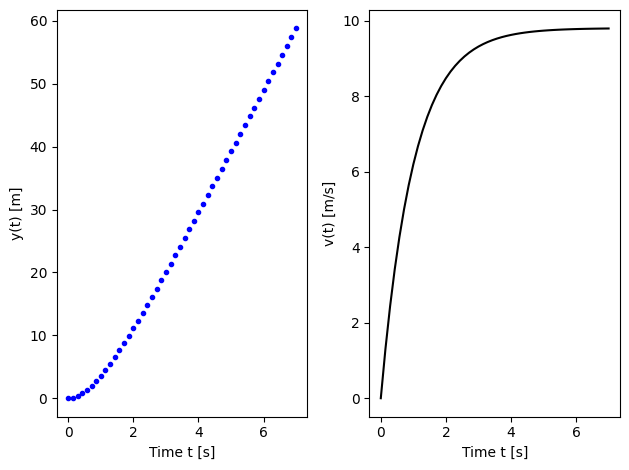

In [1]:
from sympy import symbols, exp, diff, simplify
import numpy as np
import matplotlib.pyplot as plt

t, y0, m, v0, b, g = symbols('t,y0,m,v0,b,g', real=True)

v = diff(y0+m*g*t/b+(m**2*g/b**2-m*v0/b)*(exp(-b*t/m)-1),t)
print('v(t)', simplify(v))

a = diff(v, t)
print('a(t)', simplify(a))

b, m, g, v0, y0 = 1.0, 1, 9.8, 0, 0

tims = np.linspace(0, 7, 50)

yt = y0 + m*g*tims/b+(m**2*g/b**2-m*v0/b)*(np.exp(-b*tims/m)-1)
vt = (b*v0 + g*m*np.exp(b*tims/m) - g*m)*np.exp(-b*tims/m)/b

plt.subplot(1,2,1)
plt.plot(tims, yt, 'b.')
plt.xlabel('Time t [s]')
plt.ylabel('y(t) [m]')

plt.subplot(1,2,2)
plt.plot(tims, vt, 'k')
plt.xlabel('Time t [s]')
plt.ylabel('v(t) [m/s]')

plt.tight_layout()
plt.show()